<a href="https://colab.research.google.com/github/kato1329/CATech/blob/main/LayerNorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
folder_path = './drive/MyDrive/catimage/'

In [4]:
###サンプルデータの作成：例としてRGB3チャンネルからなる画像データを生成
image_files = []
for image_num in range(5):
  image_name = 'cat{}.jpeg'.format(image_num+1)
  image_path = folder_path + image_name
  image = cv2.imread(image_path)
  image = cv2.resize(image,dsize=(224,224))
  image_files.append(image)
image_files = np.stack(image_files,axis=0)

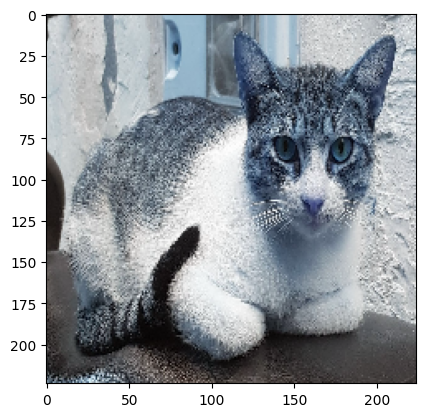

In [5]:
plt.imshow(image_files[0])
plt.show()

In [6]:
image_files = image_files.transpose(0,3,1,2)

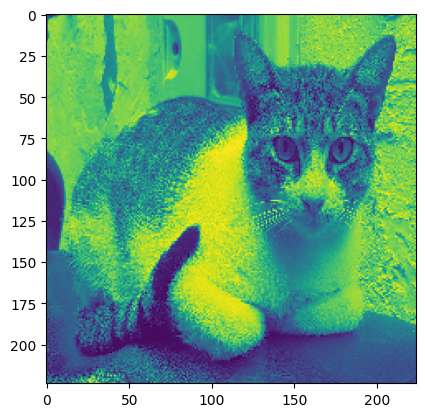

In [7]:
plt.imshow(image_files[0][1])
plt.show()

In [8]:
image_files.shape

(5, 3, 224, 224)

In [9]:
sum = np.zeros((224,224))
eps = np.full((224,224),0.001)

new_batch = []
for i in range(5):
  new_image = []
  image = image_files[i]
  channel_R_image = image[0]
  channel_G_image = image[1]
  channel_B_image = image[2]
  mean_of_image = (channel_R_image+channel_G_image+channel_B_image)/3
  var_of_image = ((channel_R_image - mean_of_image)**2+(channel_G_image - mean_of_image)**2+(channel_B_image - mean_of_image)**2)/3

  new_channel_R = (channel_R_image - mean_of_image)/np.sqrt((var_of_image)**2 + eps)
  new_channel_G = (channel_G_image - mean_of_image)/np.sqrt((var_of_image)**2 + eps)
  new_channel_B = (channel_B_image - mean_of_image)/np.sqrt((var_of_image)**2 + eps)

  new_image.append(new_channel_R)
  new_image.append(new_channel_B)
  new_image.append(new_channel_G)

  new_image = np.stack(new_image,axis=0)

  new_batch.append(new_image)
new_batch = np.stack(new_batch,axis=0)

In [10]:
new_batch.shape

(5, 3, 224, 224)

In [11]:
new_batch = new_batch.transpose(0,2,3,1)
new_batch = new_batch*50

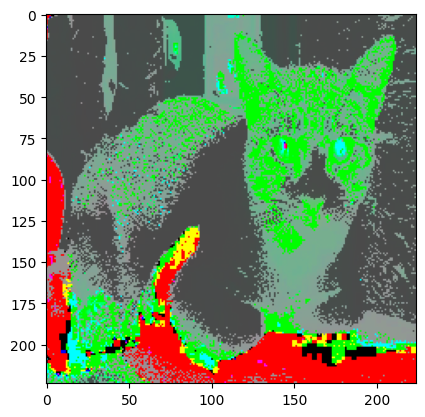

In [12]:
sample_normalized_image = new_batch[0]
plt.imshow(sample_normalized_image)
plt.show()

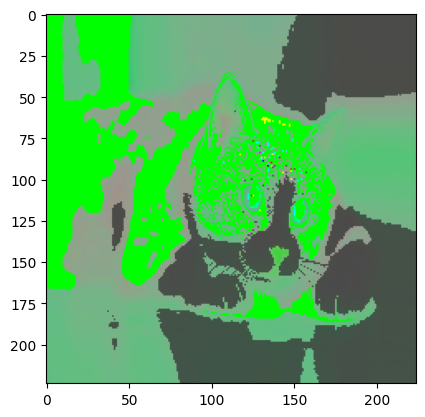

In [13]:
sample_normalized_image = new_batch[1]
plt.imshow(sample_normalized_image)
plt.show()

In [14]:
image_files_tensor = torch.from_numpy(image_files)
image_files_tensor = image_files_tensor.to(torch.float32)

In [15]:
print(image_files_tensor.shape)
print(type(image_files_tensor))

torch.Size([5, 3, 224, 224])
<class 'torch.Tensor'>


In [16]:
m = nn.LayerNorm([3,224,224])
output = m(image_files_tensor)

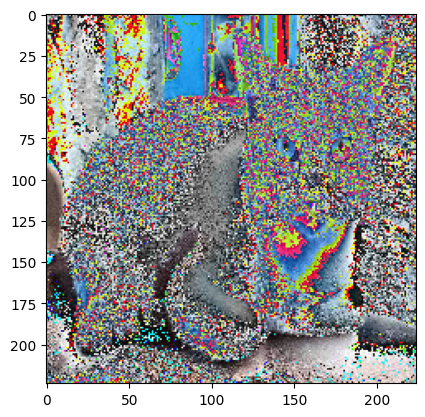

In [18]:
plt.imshow(torchvision.transforms.functional.to_pil_image(output[0]))
plt.show()